In [1]:
import tensorflow as tf
import os


In [ ]:
# import cv2
# import imghdr

In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:

data = tf.keras.utils.image_dataset_from_directory('data3')


Found 3000 files belonging to 6 classes.


In [4]:
data = data.map(lambda x,y: (x/255, y))
 

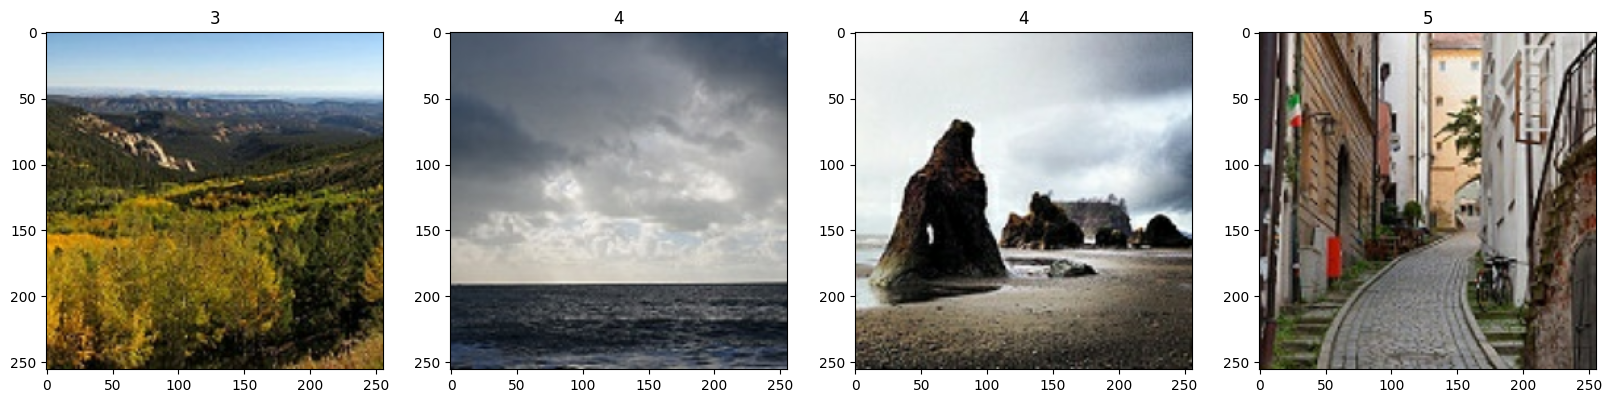

In [5]:


scaled_iterator = data.as_numpy_iterator() 


batch = scaled_iterator.next() #images represented as numpy arrays

# print(batch[0].shape)

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [6]:
len(data)*0.7 #batches

65.8

In [7]:
train_size = int(len(data)*.2) #to train
val_size = int(len(data)*.4) #to evaluate while training
test_size = int(len(data)*.4) #to test

In [8]:
val_size

37

In [9]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [10]:
len(test)

37

In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout


In [12]:
model = Sequential()


In [13]:
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))




In [14]:
model.compile('adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])


In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [16]:
logdir='logs' #


In [17]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir) #to save model


In [ ]:
train[1]

In [18]:
# hist = model.fit(train, epochs=3, validation_data=val,callbacks=[tensorboard_callback])
hist = model.fit(train, epochs=10, validation_data=val)


Epoch 1/10
18/18 [==============================] - 30s 2s/step - loss: 1.7637 - accuracy: 0.2153 - val_loss: 1.6923 - val_accuracy: 0.2593
Epoch 2/10
18/18 [==============================] - 23s 1s/step - loss: 1.3138 - accuracy: 0.4774 - val_loss: 1.1693 - val_accuracy: 0.5177
Epoch 3/10
18/18 [==============================] - 22s 1s/step - loss: 1.1186 - accuracy: 0.5521 - val_loss: 1.3056 - val_accuracy: 0.5127
Epoch 4/10
18/18 [==============================] - 28s 2s/step - loss: 1.0894 - accuracy: 0.5938 - val_loss: 1.2809 - val_accuracy: 0.5186
Epoch 5/10
18/18 [==============================] - 24s 1s/step - loss: 0.9544 - accuracy: 0.6302 - val_loss: 1.0357 - val_accuracy: 0.6073
Epoch 6/10
18/18 [==============================] - 23s 1s/step - loss: 0.9355 - accuracy: 0.6562 - val_loss: 0.9747 - val_accuracy: 0.6486
Epoch 7/10
18/18 [==============================] - 22s 1s/step - loss: 0.7752 - accuracy: 0.7188 - val_loss: 0.9667 - val_accuracy: 0.6478
Epoch 8/10
18/18 [==

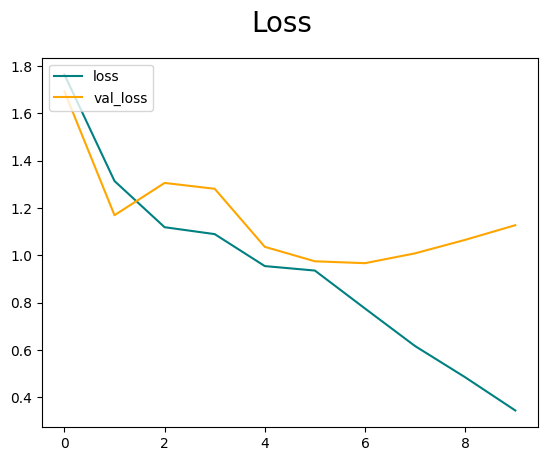

In [19]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

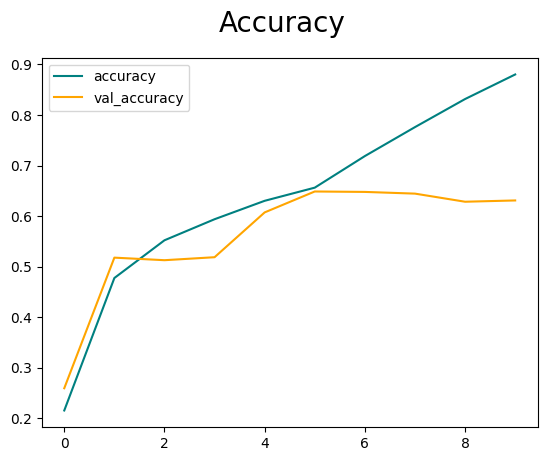

In [20]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [22]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [23]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    predict_x=model.predict(X) 
#     yhat = model.predict_classes(X)
    yhat=np.argmax(predict_x,axis=1)

    pre.update_state(y, yhat)
    re.update_state(y, yhat)
#     acc.update_state(y, yhat)

1/1 [==============================] - 0s 167ms/step


In [24]:
print(f'Precision:{pre.result().numpy()}, Recall: {re.result().numpy()},Accuracy: {acc.result().numpy()}')


Precision:0.9070450067520142, Recall: 0.9169139266014099,Accuracy: 0.0
